In [1]:
import rasterio as rs
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image
import os
import pandas as pd
import cv2
import numpy as np
from rasterio.plot import show
import geopandas as gpd
from shapely.geometry import Point, Polygon  # for geometry processing
from tqdm.notebook import tqdm

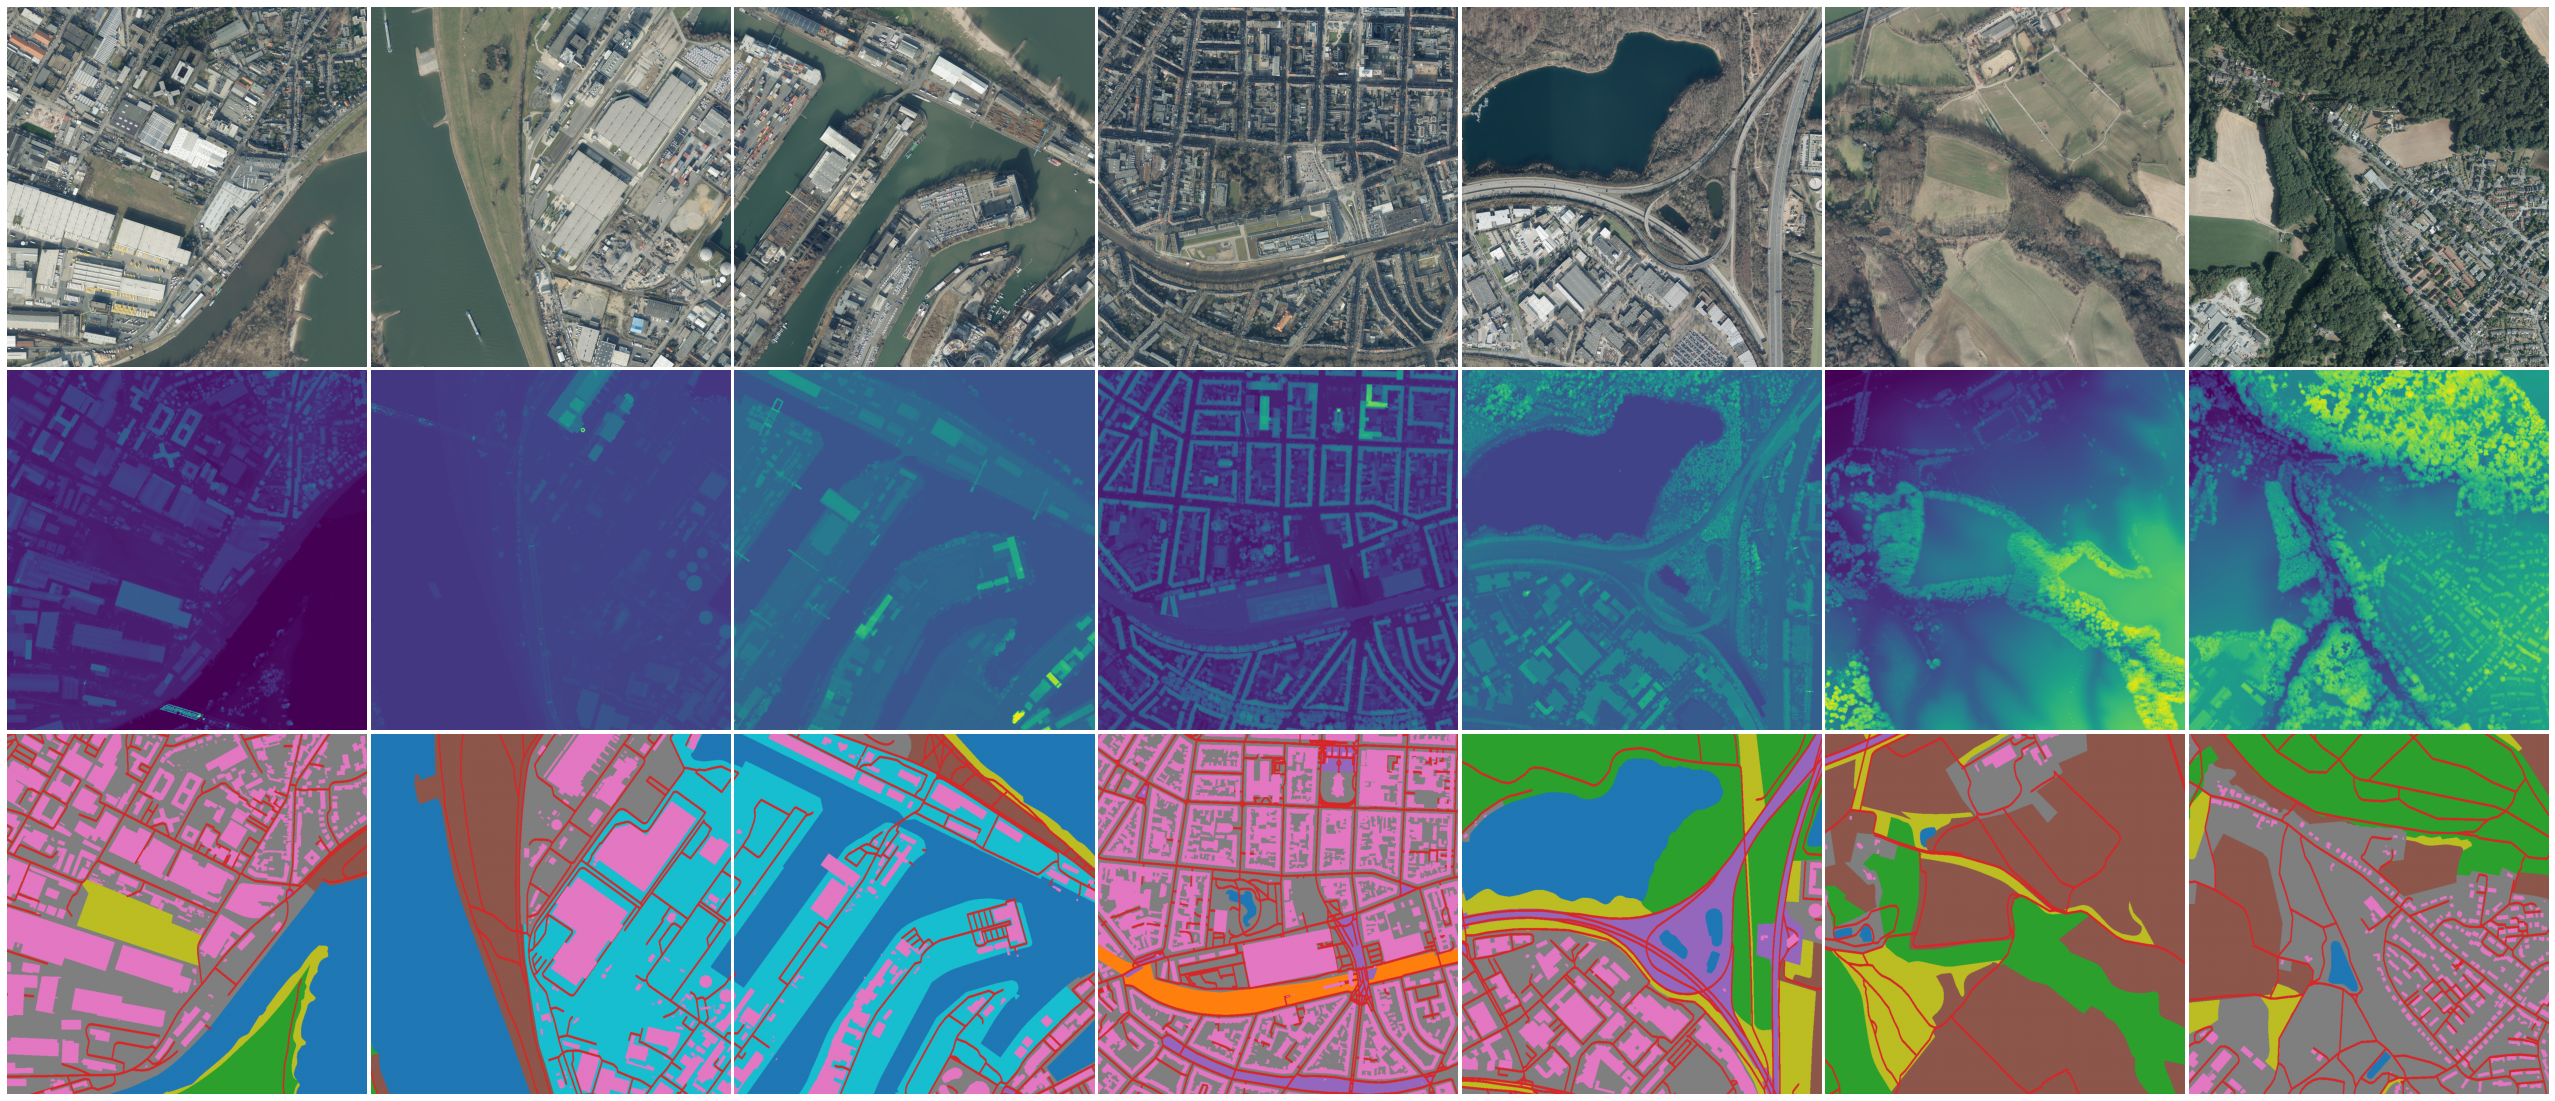

In [2]:
""" plots some examples of the dataset """

root = '../input/geonrw/data/'
paths = [
    "duesseldorf/340_5677",
    "duesseldorf/341_5676",
    "duesseldorf/342_5676",
    "duesseldorf/344_5675",
    "duesseldorf/346_5684",
    "duesseldorf/350_5682",
    "herne/379_5709",
]


#######################################
#                                     #
# Conversion of land cover map to RGB #
#                                     #
#######################################

lcov_cmap = matplotlib.colors.ListedColormap(
    [
        "#2ca02c",  # green for forest
        "#1f77b4",  # blue for water
        "#8c564b",  # brown for agricultural
        "#7f7f7f",  # gray urban
        "#bcbd22",  # olive for grassland
        "#ff7f0e",  # orange for railway
        "#9467bd",  # purple for highway
        "#17becf",  # cyan for airports and shipyards
        "#d62728",  # red for roads
        "#e377c2",  # pink for buildings
    ]
)
lcov_norm = matplotlib.colors.Normalize(vmin=1, vmax=10)


def seg2rgb(seg_map):
    """ converts segmentation map to a plotable RGB image """
    return lcov_cmap(lcov_norm(seg_map))[:, :, :3]


############
#          #
# Plotting #
#          #
############

def calc_figsize(paths):
    def add_padding(dim):
        pad = 0.01
        return dim + (dim - 1) * pad

    nrows = 3
    ncols = len(paths)
    return 5*add_padding(ncols), 5*add_padding(nrows)


fig = plt.figure(figsize=calc_figsize(paths))
fig.subplots_adjust(top=1.0, bottom=0.0, left=0.0, right=1.0, hspace=0.01, wspace=0.01)
grid = gridspec.GridSpec(ncols=len(paths), nrows=3, figure=fig)

for idx, path in enumerate(paths):
    rgb = Image.open(root + path + "_rgb.jp2").convert("RGB")
    ax_rgb = fig.add_subplot(grid[0, idx])
    ax_rgb.imshow(rgb)
    ax_rgb.axis("off")

    dem = np.array(Image.open(root + path + "_dem.tif"))
    ax_dem = fig.add_subplot(grid[1, idx])
    ax_dem.imshow(dem)
    ax_dem.axis("off")

    seg = np.array(Image.open(root + path + "_seg.tif"))
    ax_seg = fig.add_subplot(grid[2, idx])
    ax_seg.imshow(seg2rgb(seg))
    ax_seg.axis("off")



In [3]:
img = rs.open('../input/geonrw/data/bergisch/364_5650_rgb.jp2')
img = rs.plot.reshape_as_image(img.read())
seg = rs.open('../input/geonrw/data/bergisch/364_5650_seg.tif')
seg = rs.plot.reshape_as_image(seg.read())


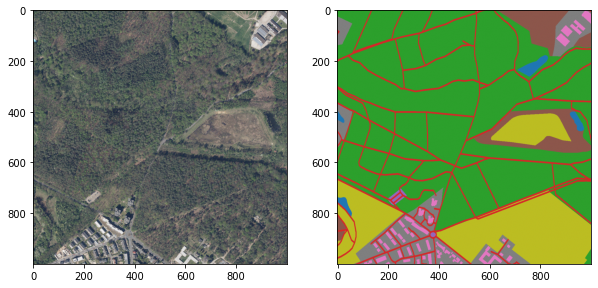

In [4]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(img[:,:,:3])
ax[1].imshow(seg2rgb(seg[:,:,0]))


In [5]:

path = []
mode = []
bounds =[]
category = []
ids = []


root_dir = '../input/geonrw/data/'

for p, _, files in tqdm(os.walk(root_dir)):
    print(p)
    for file_name in tqdm(files):
        if file_name.startswith('.') :
            continue  
        file_id = file_name[:8]
        file_path = p[9:]+'/'+file_name
        cat = p[21:]
        mod = file_path[-7:-4]
        raster = rs.open(p + '/' + file_name)
        lbox, bbox, rbox, tbox = raster.bounds
        geometry = Polygon([(lbox,tbox),
                  (rbox,tbox),
                  (rbox,bbox),
                  (lbox,bbox)])
        ids.append(file_id)
        path.append(file_path)
        category.append(cat)
        mode.append(mod)
        bounds.append(geometry)

0it [00:00, ?it/s]

../input/geonrw/data/


  0%|          | 0/1 [00:00<?, ?it/s]

../input/geonrw/data/erftstadt


  0%|          | 0/483 [00:00<?, ?it/s]

../input/geonrw/data/lotte


  0%|          | 0/252 [00:00<?, ?it/s]

../input/geonrw/data/duisburg


  0%|          | 0/867 [00:00<?, ?it/s]

../input/geonrw/data/recklinghausen


  0%|          | 0/276 [00:00<?, ?it/s]

../input/geonrw/data/coesfeld


  0%|          | 0/531 [00:00<?, ?it/s]

../input/geonrw/data/hamm


  0%|          | 0/819 [00:00<?, ?it/s]

../input/geonrw/data/hoexter


  0%|          | 0/654 [00:00<?, ?it/s]

../input/geonrw/data/bielefeld


  0%|          | 0/933 [00:00<?, ?it/s]

../input/geonrw/data/moenchengladbach


  0%|          | 0/648 [00:00<?, ?it/s]

../input/geonrw/data/siegen


  0%|          | 0/474 [00:00<?, ?it/s]

../input/geonrw/data/leverkusen


  0%|          | 0/324 [00:00<?, ?it/s]

../input/geonrw/data/muelheim


  0%|          | 0/357 [00:00<?, ?it/s]

../input/geonrw/data/bochum


  0%|          | 0/552 [00:00<?, ?it/s]

../input/geonrw/data/dortmund


  0%|          | 0/996 [00:00<?, ?it/s]

../input/geonrw/data/muenster


  0%|          | 0/1062 [00:00<?, ?it/s]

../input/geonrw/data/krefeld


  0%|          | 0/534 [00:00<?, ?it/s]

../input/geonrw/data/lippetal


  0%|          | 0/480 [00:00<?, ?it/s]

../input/geonrw/data/moers


  0%|          | 0/288 [00:00<?, ?it/s]

../input/geonrw/data/ennepetal


  0%|          | 0/258 [00:00<?, ?it/s]

../input/geonrw/data/aachen


  0%|          | 0/708 [00:00<?, ?it/s]

../input/geonrw/data/solingen


  0%|          | 0/363 [00:00<?, ?it/s]

../input/geonrw/data/euskirchen


  0%|          | 0/534 [00:00<?, ?it/s]

../input/geonrw/data/hagen


  0%|          | 0/630 [00:00<?, ?it/s]

../input/geonrw/data/oberhausen


  0%|          | 0/327 [00:00<?, ?it/s]

../input/geonrw/data/neuss


  0%|          | 0/390 [00:00<?, ?it/s]

../input/geonrw/data/wuppertal


  0%|          | 0/660 [00:00<?, ?it/s]

../input/geonrw/data/remscheid


  0%|          | 0/297 [00:00<?, ?it/s]

../input/geonrw/data/essen


  0%|          | 0/792 [00:00<?, ?it/s]

../input/geonrw/data/bottrop


  0%|          | 0/408 [00:00<?, ?it/s]

../input/geonrw/data/koeln


  0%|          | 0/1437 [00:00<?, ?it/s]

../input/geonrw/data/gelsenkirchen


  0%|          | 0/411 [00:00<?, ?it/s]

../input/geonrw/data/paderborn


  0%|          | 0/666 [00:00<?, ?it/s]

../input/geonrw/data/dueren


  0%|          | 0/348 [00:00<?, ?it/s]

../input/geonrw/data/bergisch


  0%|          | 0/351 [00:00<?, ?it/s]

../input/geonrw/data/heinsberg


  0%|          | 0/378 [00:00<?, ?it/s]

../input/geonrw/data/duesseldorf


  0%|          | 0/843 [00:00<?, ?it/s]

../input/geonrw/data/herne


  0%|          | 0/222 [00:00<?, ?it/s]

../input/geonrw/data/guetersloh


  0%|          | 0/444 [00:00<?, ?it/s]

../input/geonrw/data/bonn


  0%|          | 0/549 [00:00<?, ?it/s]

../input/geonrw/data/herford


  0%|          | 0/333 [00:00<?, ?it/s]

../input/geonrw/data/kleve


  0%|          | 0/438 [00:00<?, ?it/s]

../input/geonrw/data/lippstadt


  0%|          | 0/459 [00:00<?, ?it/s]

../input/geonrw/data/borken


  0%|          | 0/573 [00:00<?, ?it/s]

In [6]:
crs = raster.crs

In [7]:
data_frame = gpd.GeoDataFrame(data={'category':category,
                                    'mode':mode,
                                    'file_id':ids,
                                    'file_path':path,
                                    'geometry':bounds},
                             crs=crs)

In [8]:
data_frame

category mode   file_id                               file_path  \
0      erftstadt  dem  338_5623  geonrw/data/erftstadt/338_5623_dem.tif   
1      erftstadt  dem  336_5634  geonrw/data/erftstadt/336_5634_dem.tif   
2      erftstadt  dem  345_5636  geonrw/data/erftstadt/345_5636_dem.tif   
3      erftstadt  seg  346_5629  geonrw/data/erftstadt/346_5629_seg.tif   
4      erftstadt  seg  338_5628  geonrw/data/erftstadt/338_5628_seg.tif   
...          ...  ...       ...                                     ...   
23344     borken  rgb  347_5750     geonrw/data/borken/347_5750_rgb.jp2   
23345     borken  rgb  344_5747     geonrw/data/borken/344_5747_rgb.jp2   
23346     borken  dem  348_5742     geonrw/data/borken/348_5742_dem.tif   
23347     borken  seg  343_5744     geonrw/data/borken/343_5744_seg.tif   
23348     borken  seg  353_5750     geonrw/data/borken/353_5750_seg.tif   

                                                geometry  
0      POLYGON ((338000.000 5624000.000, 339000.000 5...  
1      POLYGON ((336000.000 5635000.000, 337000.000 5...  
2      POLYGON ((345000.000 5637000.000, 346000.000 5...  
3      POLYGON ((346000.000 5630000.000, 347000.000 5...  
4      POLYGON ((338000.000 5629000.000, 339000.000 5...  
...                                                  ...  
23344  POLYGON ((347000.000 5751000.000, 348000.000 5...  
23345  POLYGON ((344000.000 5748000.000, 345000.000 5...  
23346  POLYGON ((348000.000 5743000.000, 349000.000 5...  
23347  POLYGON ((343000.000 5745000.000, 344000.000 5...  
23348  POLYGON ((353000.000 5751000.000, 354000.000 5...  

[23349 rows x 5 columns]

In [10]:
data_frame.to_file('summary.geojson',driver='GeoJSON')